In [ ]:
from google.colab import drive


In [ ]:
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [ ]:
# Importando as bibliotecas necessárias.
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , f1_score, precision_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/tcc/base_de_dados_tcc_tratada_v3.csv')
df

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,WIN,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
0,2015-2016_Bournemouth_Aston Villa,2015-2016,1,8/8/2015,NaN,Bournemouth,Aston Villa,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0
1,2015-2016_Chelsea_Swansea,2015-2016,1,8/8/2015,NaN,Chelsea,Swansea,2.0,2.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2,2015-2016_Everton_Watford,2015-2016,1,8/8/2015,NaN,Everton,Watford,2.0,2.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
3,2015-2016_Leicester_Sunderland,2015-2016,1,8/8/2015,NaN,Leicester,Sunderland,4.0,2.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0
4,2015-2016_Man United_Tottenham,2015-2016,1,8/8/2015,NaN,Man United,Tottenham,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,2024_2025_Southampton_Everton,2024-2025,10,11/02/2024,15:00,Southampton,Everton,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3515,2024_2025_Wolves Crystal_Palace,2024-2025,10,11/02/2024,15:00,Wolves,Crystal Palace,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3516,2024_2025_Tottenham Aston_Villa,2024-2025,10,11/02/2024,15:00,Tottenham,Aston Villa,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3517,2024_2025_Man United_Chelsea,2024-2025,10,11/02/2024,15:00,Man United,Chelsea,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Criando a coluna com o identificador do jogo (ID_PARTIDA)

df = pd.DataFrame(df)
df = df.reset_index()
df = df.rename(columns = {"index": "ID_PARTIDA"})
df["ID_PARTIDA"] = df.index + 1

In [ ]:
def calcular_dupla_hipotese(odds_empate, odds_fora, overround=1.14):
    """
    Calcula as odds para a dupla hipótese (empate ou vitória fora),
    ajustadas pela margem de lucro (overround) da casa de apostas.

    Parameters:
    odds_empate (float): odds para empate.
    odds_fora (float): odds para vitória fora.
    overround (float): fator de overround (por exemplo, 1.07 para uma margem de 7%).

    Returns:
    float: odds ajustadas para "empate ou vitória fora".
    """
    # Calcular as probabilidades implícitas
    prob_empate = 1 / odds_empate
    prob_fora = 1 / odds_fora

    # Calcular a probabilidade combinada sem ajustar o overround
    prob_fora_ou_empate = prob_empate + prob_fora - (prob_empate * prob_fora)

    # Ajustar a probabilidade combinada com a margem de lucro (overround)
    prob_fora_ou_empate_ajustada = prob_fora_ou_empate * overround

    # Converter a probabilidade ajustada em odds
    odds_fora_ou_empate = 1 / prob_fora_ou_empate_ajustada

    return odds_fora_ou_empate


In [ ]:
df['DRAW_OR_AWAY'] = None

for i in range(len(df)):
    empate = df.loc[i, "X_BET"]
    fora = df.loc[i, "A_BET"]

    df.loc[i, 'DRAW_OR_AWAY'] = calcular_dupla_hipotese(empate, fora)

df.DRAW_OR_AWAY

,DRAW_OR_AWAY
0,1.913876
1,3.216374
2,2.239975
3,1.946392
4,2.339181
...,...
3514,1.550877
3515,1.578947
3516,1.870888
3517,1.521661


In [ ]:
# Função para calcular a média dos últimos 5 chutes para cada time
def calculate_average_shots(team, df, current_date, home_column, away_column, is_home):
    if is_home:
        # Selecionar jogos onde o time é "Home"
        home_games = df[(df['HomeTeam'] == team) & (df['Date'] < current_date)][['Date', home_column]]
        # Renomear a coluna para Shots
        home_games.columns = ['Date', 'Shots']
        return home_games.sort_values(by='Date', ascending=False).head(5)['Shots'].mean() if not home_games.empty else 0
    else:
        # Selecionar jogos onde o time é "Away"
        away_games = df[(df['AwayTeam'] == team) & (df['Date'] < current_date)][['Date', away_column]]
        # Renomear a coluna para Shots
        away_games.columns = ['Date', 'Shots']
        return away_games.sort_values(by='Date', ascending=False).head(5)['Shots'].mean() if not away_games.empty else 0

# Converter a coluna Date para datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')

# Inicializar listas para armazenar os resultados
avg_home_shots = []
avg_away_shots = []

# Iterar sobre o DataFrame para calcular as médias de chutes
for index, row in df.iterrows():
    team_home = row['HomeTeam']
    team_away = row['AwayTeam']
    current_date = row['Date']

    # Calcular a média dos chutes para o time da casa (usando HomeTeamShots)
    avg_home = calculate_average_shots(team_home, df, current_date, 'HomeTeamShots', 'AwayTeamShots', is_home=True)
    # Calcular a média dos chutes para o time visitante (usando AwayTeamShots)
    avg_away = calculate_average_shots(team_away, df, current_date, 'HomeTeamShots', 'AwayTeamShots', is_home=False)

    # Armazenar os resultados
    avg_home_shots.append(avg_home)
    avg_away_shots.append(avg_away)

# Adicionar as colunas de médias ao DataFrame original
df['Avg_home_shots'] = avg_home_shots
df['Avg_away_shots'] = avg_away_shots

# Exibir os resultados
print(df[['Date', 'HomeTeam', 'AwayTeam', 'Avg_home_shots', 'Avg_away_shots']])


           Date     HomeTeam        AwayTeam  Avg_home_shots  Avg_away_shots
0    2015-08-08  Bournemouth     Aston Villa             0.0             0.0
1    2015-08-08      Chelsea         Swansea             0.0             0.0
2    2015-08-08      Everton         Watford             0.0             0.0
3    2015-08-08    Leicester      Sunderland             0.0             0.0
4    2015-08-08   Man United       Tottenham             0.0             0.0
...         ...          ...             ...             ...             ...
3514 2024-11-02  Southampton         Everton            10.2             9.6
3515 2024-11-02       Wolves  Crystal Palace             9.6            14.6
3516 2024-11-02    Tottenham     Aston Villa            16.6            10.8
3517 2024-11-02   Man United         Chelsea            14.6            11.2
3518 2024-11-02       Fulham       Brentford            14.4             8.2

[3519 rows x 5 columns]


In [ ]:
# Função para calcular a média dos últimos 5 escanteios para cada time
def calculate_average_corners(team, df, current_date, home_column, away_column, is_home):
    if is_home:
        # Selecionar jogos onde o time é "Home"
        home_games = df[(df['HomeTeam'] == team) & (df['Date'] < current_date)][['Date', home_column]]
        # Renomear a coluna para Shots
        home_games.columns = ['Date', 'Corners']
        return home_games.sort_values(by='Date', ascending=False).head(5)['Corners'].mean() if not home_games.empty else 0
    else:
        # Selecionar jogos onde o time é "Away"
        away_games = df[(df['AwayTeam'] == team) & (df['Date'] < current_date)][['Date', away_column]]
        # Renomear a coluna para Corners
        away_games.columns = ['Date', 'Corners']
        return away_games.sort_values(by='Date', ascending=False).head(5)['Corners'].mean() if not away_games.empty else 0

# Converter a coluna Date para datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')

# Inicializar listas para armazenar os resultados
avg_home_corners = []
avg_away_corners = []

# Iterar sobre o DataFrame para calcular as médias de escanteios
for index, row in df.iterrows():
    team_home = row['HomeTeam']
    team_away = row['AwayTeam']
    current_date = row['Date']

    # Calcular a média dos escanteios para o time da casa (usando HomeTeamCorners)
    avg_home = calculate_average_corners(team_home, df, current_date, 'HomeTeamCorners', 'AwayTeamCorners', is_home=True)
    # Calcular a média dos escanteios para o time visitante (usando AwayTeamCorners)
    avg_away = calculate_average_corners(team_away, df, current_date, 'HomeTeamCorners', 'AwayTeamCorners', is_home=False)

    # Armazenar os resultados
    avg_home_corners.append(avg_home)
    avg_away_corners.append(avg_away)

# Adicionar as colunas de médias ao DataFrame original
df['Avg_home_corners'] = avg_home_corners
df['Avg_away_corners'] = avg_away_corners

# Exibir os resultados
print(df[['Date', 'HomeTeam', 'AwayTeam', 'Avg_home_corners', 'Avg_away_corners']])

           Date     HomeTeam        AwayTeam  Avg_home_corners  \
0    2015-08-08  Bournemouth     Aston Villa               0.0   
1    2015-08-08      Chelsea         Swansea               0.0   
2    2015-08-08      Everton         Watford               0.0   
3    2015-08-08    Leicester      Sunderland               0.0   
4    2015-08-08   Man United       Tottenham               0.0   
...         ...          ...             ...               ...   
3514 2024-11-02  Southampton         Everton               3.6   
3515 2024-11-02       Wolves  Crystal Palace               4.0   
3516 2024-11-02    Tottenham     Aston Villa               9.6   
3517 2024-11-02   Man United         Chelsea               7.0   
3518 2024-11-02       Fulham       Brentford               4.6   

      Avg_away_corners  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
3514               3.2  
3515   

In [ ]:
# Função para calcular a média dos últimos 5 chutes ao alvo para cada time
def calculate_average_shots_on_target(team, df, current_date, home_column, away_column, is_home):
    if is_home:
        # Selecionar jogos onde o time é "Home"
        home_games = df[(df['HomeTeam'] == team) & (df['Date'] < current_date)][['Date', home_column]]
        # Renomear a coluna para Shots
        home_games.columns = ['Date', 'ShotsOnTarget']
        return home_games.sort_values(by='Date', ascending=False).head(5)['ShotsOnTarget'].mean() if not home_games.empty else 0
    else:
        # Selecionar jogos onde o time é "Away"
        away_games = df[(df['AwayTeam'] == team) & (df['Date'] < current_date)][['Date', away_column]]
        # Renomear a coluna para ShotsOnTarget
        away_games.columns = ['Date', 'ShotsOnTarget']
        return away_games.sort_values(by='Date', ascending=False).head(5)['ShotsOnTarget'].mean() if not away_games.empty else 0

# Converter a coluna Date para datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')

# Inicializar listas para armazenar os resultados
avg_home_shots_on_target = []
avg_away_shots_on_target = []

# Iterar sobre o DataFrame para calcular as médias de chutes ao alvo
for index, row in df.iterrows():
    team_home = row['HomeTeam']
    team_away = row['AwayTeam']
    current_date = row['Date']

    # Calcular a média dos chutes ao alvo para o time da casa (usando HomeTeamShotsOnTarget)
    avg_home = calculate_average_shots_on_target(team_home, df, current_date, 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', is_home=True)
    # Calcular a média dos chutes ao alvo para o time visitante (usando AwayTeamShotsOnTarget)
    avg_away = calculate_average_shots_on_target(team_away, df, current_date, 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', is_home=False)

    # Armazenar os resultados
    avg_home_shots_on_target.append(avg_home)
    avg_away_shots_on_target.append(avg_away)

# Adicionar as colunas de médias ao DataFrame original
df['Avg_home_shots_on_target'] = avg_home_shots_on_target
df['Avg_away_shots_on_target'] = avg_away_shots_on_target

# Exibir os resultados
print(df[['Date', 'HomeTeam', 'AwayTeam', 'Avg_home_shots_on_target', 'Avg_away_shots_on_target']])

           Date     HomeTeam        AwayTeam  Avg_home_shots_on_target  \
0    2015-08-08  Bournemouth     Aston Villa                       0.0   
1    2015-08-08      Chelsea         Swansea                       0.0   
2    2015-08-08      Everton         Watford                       0.0   
3    2015-08-08    Leicester      Sunderland                       0.0   
4    2015-08-08   Man United       Tottenham                       0.0   
...         ...          ...             ...                       ...   
3514 2024-11-02  Southampton         Everton                       5.0   
3515 2024-11-02       Wolves  Crystal Palace                       4.2   
3516 2024-11-02    Tottenham     Aston Villa                       6.8   
3517 2024-11-02   Man United         Chelsea                       5.8   
3518 2024-11-02       Fulham       Brentford                       5.4   

      Avg_away_shots_on_target  
0                          0.0  
1                          0.0  
2           

In [ ]:
# Alterando os resultados de string (Draw = empate, Home = vitória do time da casa, Away = vitória do time visitante), para
# inteiro (0 = empate, 1 = vitória do time da casa, 2 = vitória do time visitante)
for i in range(0,len(df)):
    if pd.notna(df["WIN"][i]):
      if df["WIN"][i] == "H":
          df.at[i,"WIN"] = '0'
      if df["WIN"][i] == "D":
          df.at[i,"WIN"] = '1'
      if df["WIN"][i] == "A":
          df.at[i,"WIN"] = '1'

df["WIN"] = pd.to_numeric(df["WIN"], errors='coerce').fillna(-1).astype(int)

Total de jogos:  3519
Total de colunas:  51
Total de jogos ganhos em casa:  1573
Total de jogos ganhos pelo visitante:  1936
Percentual de jogos ganhos em casa: 44.70%


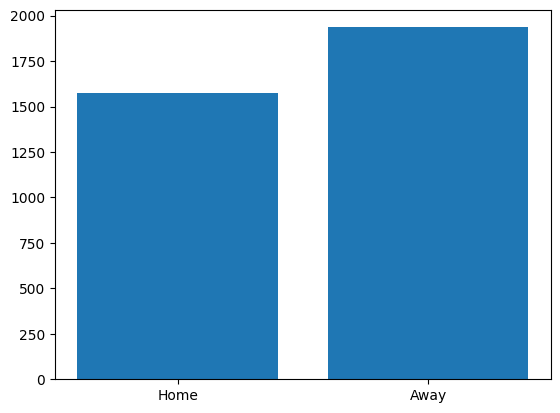

In [ ]:
# Capturando a quantidade de partidas e colunas da base
matches = df.shape[0]
features = df.shape[1]

# Separando as vitórias do time da casa, visitante e empate
home_win = len(df[df.WIN==0])
away_win = len(df[df.WIN==1])
val = [home_win, away_win]

# Percentual de vitórias do time da casa
win_rate = (float(home_win)/(matches)) *100

# Mostrando na tela os resultados em texto e gráfico
print ('Total de jogos: ', matches)
print ('Total de colunas: ', features)
print ('Total de jogos ganhos em casa: ', home_win)
print ('Total de jogos ganhos pelo visitante: ', away_win)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( win_rate ))
x = np.arange(2)
plt.bar(x, val)
plt.xticks(x, ('Home', 'Away'))
plt.show()

In [ ]:
df

,ID_PARTIDA,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,...,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints,DRAW_OR_AWAY,Avg_home_shots,Avg_away_shots,Avg_home_corners,Avg_away_corners,Avg_home_shots_on_target,Avg_away_shots_on_target
0,1,2015-2016_Bournemouth_Aston Villa,2015-2016,1,2015-08-08,NaN,Bournemouth,Aston Villa,0.0,1.0,...,NaN,0.0,3.0,1.913876,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2015-2016_Chelsea_Swansea,2015-2016,1,2015-08-08,NaN,Chelsea,Swansea,2.0,2.0,...,NaN,1.0,1.0,3.216374,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2015-2016_Everton_Watford,2015-2016,1,2015-08-08,NaN,Everton,Watford,2.0,2.0,...,NaN,1.0,1.0,2.239975,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2015-2016_Leicester_Sunderland,2015-2016,1,2015-08-08,NaN,Leicester,Sunderland,4.0,2.0,...,NaN,3.0,0.0,1.946392,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2015-2016_Man United_Tottenham,2015-2016,1,2015-08-08,NaN,Man United,Tottenham,1.0,0.0,...,NaN,3.0,0.0,2.339181,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,3515,2024_2025_Southampton_Everton,2024-2025,10,2024-11-02,15:00,Southampton,Everton,NaN,NaN,...,NaN,NaN,NaN,1.550877,10.2,9.6,3.6,3.2,5.0,3.6
3515,3516,2024_2025_Wolves Crystal_Palace,2024-2025,10,2024-11-02,15:00,Wolves,Crystal Palace,NaN,NaN,...,NaN,NaN,NaN,1.578947,9.6,14.6,4.0,5.8,4.2,4.8
3516,3517,2024_2025_Tottenham Aston_Villa,2024-2025,10,2024-11-02,15:00,Tottenham,Aston Villa,NaN,NaN,...,NaN,NaN,NaN,1.870888,16.6,10.8,9.6,4.4,6.8,3.6
3517,3518,2024_2025_Man United_Chelsea,2024-2025,10,2024-11-02,15:00,Man United,Chelsea,NaN,NaN,...,NaN,NaN,NaN,1.521661,14.6,11.2,7.0,4.6,5.8,4.4


In [ ]:
features = df[['H_BET', 'DRAW_OR_AWAY', 'Avg_home_shots', 'Avg_away_shots',	'Avg_home_corners',	'Avg_away_corners',	'Avg_home_shots_on_target',	'Avg_away_shots_on_target']]
labels = df['WIN']


print('Features')
print(features.head())
print('=====================')
print('Labels')
print(labels.head())

scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ',features_scale.shape)
print(features_scale)

# Separação de treino e teste
# Treino [:2815]     representa 80% dos dados
# Teste [2815:3167]      representa 10% dos dados
# Previsão [2815:3167]     representa 10% dos dados

X_train = features_scale[:2815]
X_test = features_scale[2815:3167]
y_train = labels[:2815]
y_test = labels[2815:3167]

X_train_3_seasons = features_scale[2662:3344] # primeira linha do filtro + (0.8 * qtd de registros)
X_test_3_seasons = features_scale[3344:3429] # ponto de partida dos testes + (0.1 * qtd de registros)
y_train_3_seasons = labels[2662:3344]
y_test_3_seasons = labels[3344:3429]

X_train_5_seasons = features_scale[1902:3198]
X_test_5_seasons = features_scale[3198:3360]
y_train_5_seasons = labels[1902:3198]
y_test_5_seasons = labels[3198:3360]

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

Features
   H_BET DRAW_OR_AWAY  Avg_home_shots  Avg_away_shots  Avg_home_corners  \
0   2.00     1.913876             0.0             0.0               0.0   
1   1.36     3.216374             0.0             0.0               0.0   
2   1.70     2.239975             0.0             0.0               0.0   
3   1.95     1.946392             0.0             0.0               0.0   
4   1.65     2.339181             0.0             0.0               0.0   

   Avg_away_corners  Avg_home_shots_on_target  Avg_away_shots_on_target  
0               0.0                       0.0                       0.0  
1               0.0                       0.0                       0.0  
2               0.0                       0.0                       0.0  
3               0.0                       0.0                       0.0  
4               0.0                       0.0                       0.0  
Labels
0    1
1    1
2    1
3    0
4    0
Name: WIN, dtype: int64
Features:  (3519, 8)
[[0.04284

In [ ]:
# Rodando o modelo de Regressão Logística em sua versão multinomial

clf_LR = LogisticRegression(multi_class = 'multinomial', max_iter = 2000)
clf_LR.fit(X_train, y_train)
pred = clf_LR.predict(X_test)
# clf_LR.fit(X_train_2024, y_train_2024)
# pred = clf_LR.predict(X_test_2024)
# clf_LR.fit(X_train_5_seasons, y_train_5_seasons)
# pred = clf_LR.predict(X_test_5_seasons)
# clf_LR.fit(X_train_3_seasons, y_train_3_seasons)
# pred = clf_LR.predict(X_test_3_seasons)

lr_acc = accuracy_score(y_test, pred)
# lr_acc = accuracy_score(y_test_2024, pred)
# lr_acc = accuracy_score(y_test_5_seasons, pred)
# lr_acc = accuracy_score(y_test_3_seasons, pred)

print('Regressão Logística')
print('')
print('Acurácia: {:.2f}%'.format(lr_acc*100))

Regressão Logística

Acurácia: 66.48%
F1 Score: 65.33%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Rodando o modelo de Árvore de Decisão

clf_DT = DecisionTreeClassifier(random_state=42)
clf_DT.fit(X_train, y_train)
pred = clf_DT.predict(X_test)
# clf_DT.fit(X_train_2024, y_train_2024)
# pred = clf_DT.predict(X_test_2024)
# clf_DT.fit(X_train_5_seasons, y_train_5_seasons)
# pred = clf_DT.predict(X_test_5_seasons)
# clf_DT.fit(X_train_3_seasons, y_train_3_seasons)
# pred = clf_DT.predict(X_test_3_seasons)

dt_acc = accuracy_score(y_test, pred)
# dt_acc = accuracy_score(y_test_2024, pred)
# dt_acc = accuracy_score(y_test_5_seasons, pred)
# dt_acc = accuracy_score(y_test_3_seasons, pred)

print('Árvore de Decisão')
print('')
print('Acurácia: {:.2f}%'.format(dt_acc*100))

Árvore de Decisão

Acurácia: 56.82%
F1 Score: 56.78%


In [ ]:
# Rodando o modelo de Naive Bayes

clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
pred = clf_NB.predict(X_test)
# clf_NB.fit(X_train_2024, y_train_2024)
# pred = clf_NB.predict(X_test_2024)
# clf_NB.fit(X_train_5_seasons, y_train_5_seasons)
# pred = clf_NB.predict(X_test_5_seasons)
# clf_NB.fit(X_train_3_seasons, y_train_3_seasons)
# pred = clf_NB.predict(X_test_3_seasons)

nb_acc = accuracy_score(y_test, pred)
# nb_acc = accuracy_score(y_test_2024, pred)
# nb_acc = accuracy_score(y_test_5_seasons, pred)
# nb_acc = accuracy_score(y_test_3_seasons, pred)

print('Naive Bayes')
print('')
print('Acurácia Naive Bayes: {:.2f}%'.format(nb_acc*100))

Naive Bayes

Acurácia Naive Bayes: 63.07%
F1 Score: 62.90%


In [ ]:
# n° neuronios escondidos = 2/3 x tamanho da camada de entrada + tamanho da camada de saida
# Inicializando o classificador de Rede Neural com 7 neurônios na camada escondida
clf_NN = MLPClassifier(hidden_layer_sizes=(7,), max_iter=2000, random_state=42)

# Treinando o modelo
clf_NN.fit(X_train, y_train)
# clf_NN.fit(X_train_2024, y_train_2024)
# clf_NN.fit(X_train_5_seasons, y_train_5_seasons)
# clf_NN.fit(X_train_3_seasons, y_train_3_seasons)

# Fazendo previsões
pred_nn = clf_NN.predict(X_test)
# pred_nn = clf_NN.predict(X_test_2024)
# pred_nn = clf_NN.predict(X_test_5_seasons)
# pred_nn = clf_NN.predict(X_test_3_seasons)

# Calculando Acurácia e F1-Score
nn_acc = accuracy_score(y_test, pred_nn)
# nn_acc = accuracy_score(y_test_2024, pred_nn)
# nn_acc = accuracy_score(y_test_5_seasons, pred_nn)
# nn_acc = accuracy_score(y_test_3_seasons, pred_nn)
# precision = precision_score(y_test_3_seasons, pred, average = 'macro')

# Exibindo os resultados
print('Rede Neural')
print('')
print('Acurácia: {:.2f}%'.format(nn_acc * 100))

# Fazendo previsões de probabilidade
pred_proba = clf_NN.predict_proba(X_test)
# pred_proba = clf_NN.predict_proba(X_test_2024)
# pred_proba = clf_NN.predict_proba(X_test_5_seasons)
# pred_proba = clf_NN.predict_proba(X_test_3_seasons)

last_10_proba = pred_proba[-10:]
# Exibindo as probabilidades previstas
print('\nProbabilidades previstas:')
for i, prob in enumerate(last_10_proba):
    index = len(df) - 10 + i  # Encontrar o índice correspondente em df
    print(df['HomeTeam'][index], 'x', df['AwayTeam'][index], ':', prob, df['Date'][index])


Rede Neural

Acurácia: 66.19%
F1 Score: 65.15%

Probabilidades previstas:
Bournemouth x Man City : [0.64403791 0.35596209] 2024-11-02 00:00:00
Newcastle x Arsenal : [0.4740776 0.5259224] 2024-11-02 00:00:00
Liverpool x Brighton : [0.18478151 0.81521849] 2024-11-02 00:00:00
Ipswich x Leicester : [0.48514024 0.51485976] 2024-11-02 00:00:00
Nott'm Forest x West Ham : [0.30424724 0.69575276] 2024-11-02 00:00:00
Southampton x Everton : [0.29766794 0.70233206] 2024-11-02 00:00:00
Wolves x Crystal Palace : [0.39121001 0.60878999] 2024-11-02 00:00:00
Tottenham x Aston Villa : [0.34038347 0.65961653] 2024-11-02 00:00:00
Man United x Chelsea : [0.32868467 0.67131533] 2024-11-02 00:00:00
Fulham x Brentford : [0.25114083 0.74885917] 2024-11-02 00:00:00


In [ ]:
previsao = features_scale[3167:]

# Converter previsao para DataFrame (caso seja um ndarray)
previsao = pd.DataFrame(previsao)

# Tratar valores NaN em 'previsao' preenchendo com a média
previsao = previsao.fillna(previsao.mean())

# Preparar identificadores e resultados reais
game_id_full = df['ID_PARTIDA']
game_id_prev = game_id_full[3167:]

res_full = df['WIN']
res_prev = res_full[3167:]

# Fazer a previsão
pred = clf_NN.predict(previsao)

# Criar DataFrame para comparar previsões e valores reais
df = pd.DataFrame({'Real': res_prev, 'Previsão': pred, 'ID_PARTIDA': game_id_prev})

# Exibir o resultado
print(df)

      Real  Previsão  ID_PARTIDA
3167     1         1        3168
3168     1         1        3169
3169     0         1        3170
3170     0         0        3171
3171     0         0        3172
...    ...       ...         ...
3514    -1         1        3515
3515    -1         1        3516
3516    -1         0        3517
3517    -1         1        3518
3518    -1         1        3519

[352 rows x 3 columns]


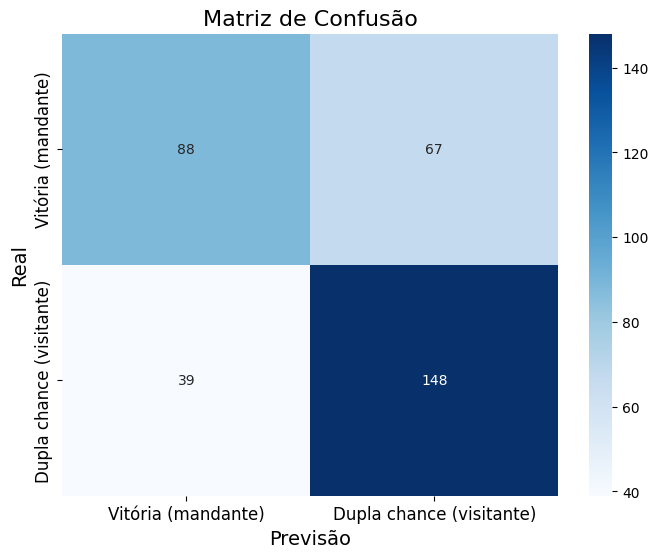

In [ ]:
# Supondo que você já tenha os dados filtrados
df_filtered = df[df['Real'] != -1]

# Gerar a matriz de confusão
cf_matrix = pd.crosstab(df_filtered['Real'], df_filtered['Previsão'], rownames=['Real'], colnames=['Previsão'])

# Plotar a matriz de confusão com labels personalizadas
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

# Alterar as labels dos eixos
ax.set_xticklabels(['Vitória (mandante)', 'Dupla chance (visitante)'], fontsize=12)
ax.set_yticklabels(['Vitória (mandante)', 'Dupla chance (visitante)'], fontsize=12)

# Adicionar títulos e nomes nos eixos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsão', fontsize=14)
plt.ylabel('Real', fontsize=14)

# Exibir o gráfico
plt.show()
